# Explore here

In [1]:
# Your code here

# Your code here

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

from sklearn import tree
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import DecisionTreeRegressor

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

# modelado (install scikit-learn)
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge


# metricas
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.metrics import f1_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import classification_report

from pickle import dump



# optimizar
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV

In [2]:
archivo="https://raw.githubusercontent.com/4GeeksAcademy/decision-tree-project-tutorial/main/diabetes.csv"

df_original = pd.read_csv(archivo, sep=",")
df = pd.read_csv(archivo, sep=",")

df.head()

datos,atributos=df.shape
print(f"Contamos con {datos} cantidad de datos y {atributos} atributos.")
print()

# Valores duplicados

duplicados = df.duplicated()
num_duplicados = duplicados.sum()

print(f"Contamos con {num_duplicados} dato duplicado.")
print()

df.info()

Contamos con 768 cantidad de datos y 9 atributos.

Contamos con 0 dato duplicado.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- Contamos con 768 datos y 9 atributos.
- No tenemos datos duplicados
- Ninguno de los atributos posee valores nulos.
- 9 características son numéricas, entre las cuales se encuentra nuestra variable objetivo Outcome que está codificada con el valor 0 para quién no posee diabetes y valor 1 para quién sí lo hace.

### Selección de atributos relevantes

Todos los atributos son relevantes para nuestro objetivo.

### Análisis univariado

Variables numéricas:

- Pregnancies: Número de embarazos del paciente.
- Glucose: Concentración de glucosa en plasma a las 2 horas de un test de tolerancia oral a la glucosa.
- BloodPressure: Presión arterial diastólica (medida en mm Hg).
- SkinThickness: Grosor del pliegue cutáneo del tríceps (medida en mm).
- Insulin: Insulina sérica de 2 horas (medida en mu U/ml).
- DiabetesPedigreeFunction: Función de pedigrí de diabetes.
- Age: Edad del paciente.
- Outcome [Variable objetivo]: 0 negativo en diabetes; 1 positivo en diabetes.

In [3]:
# Resumen estadístico
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


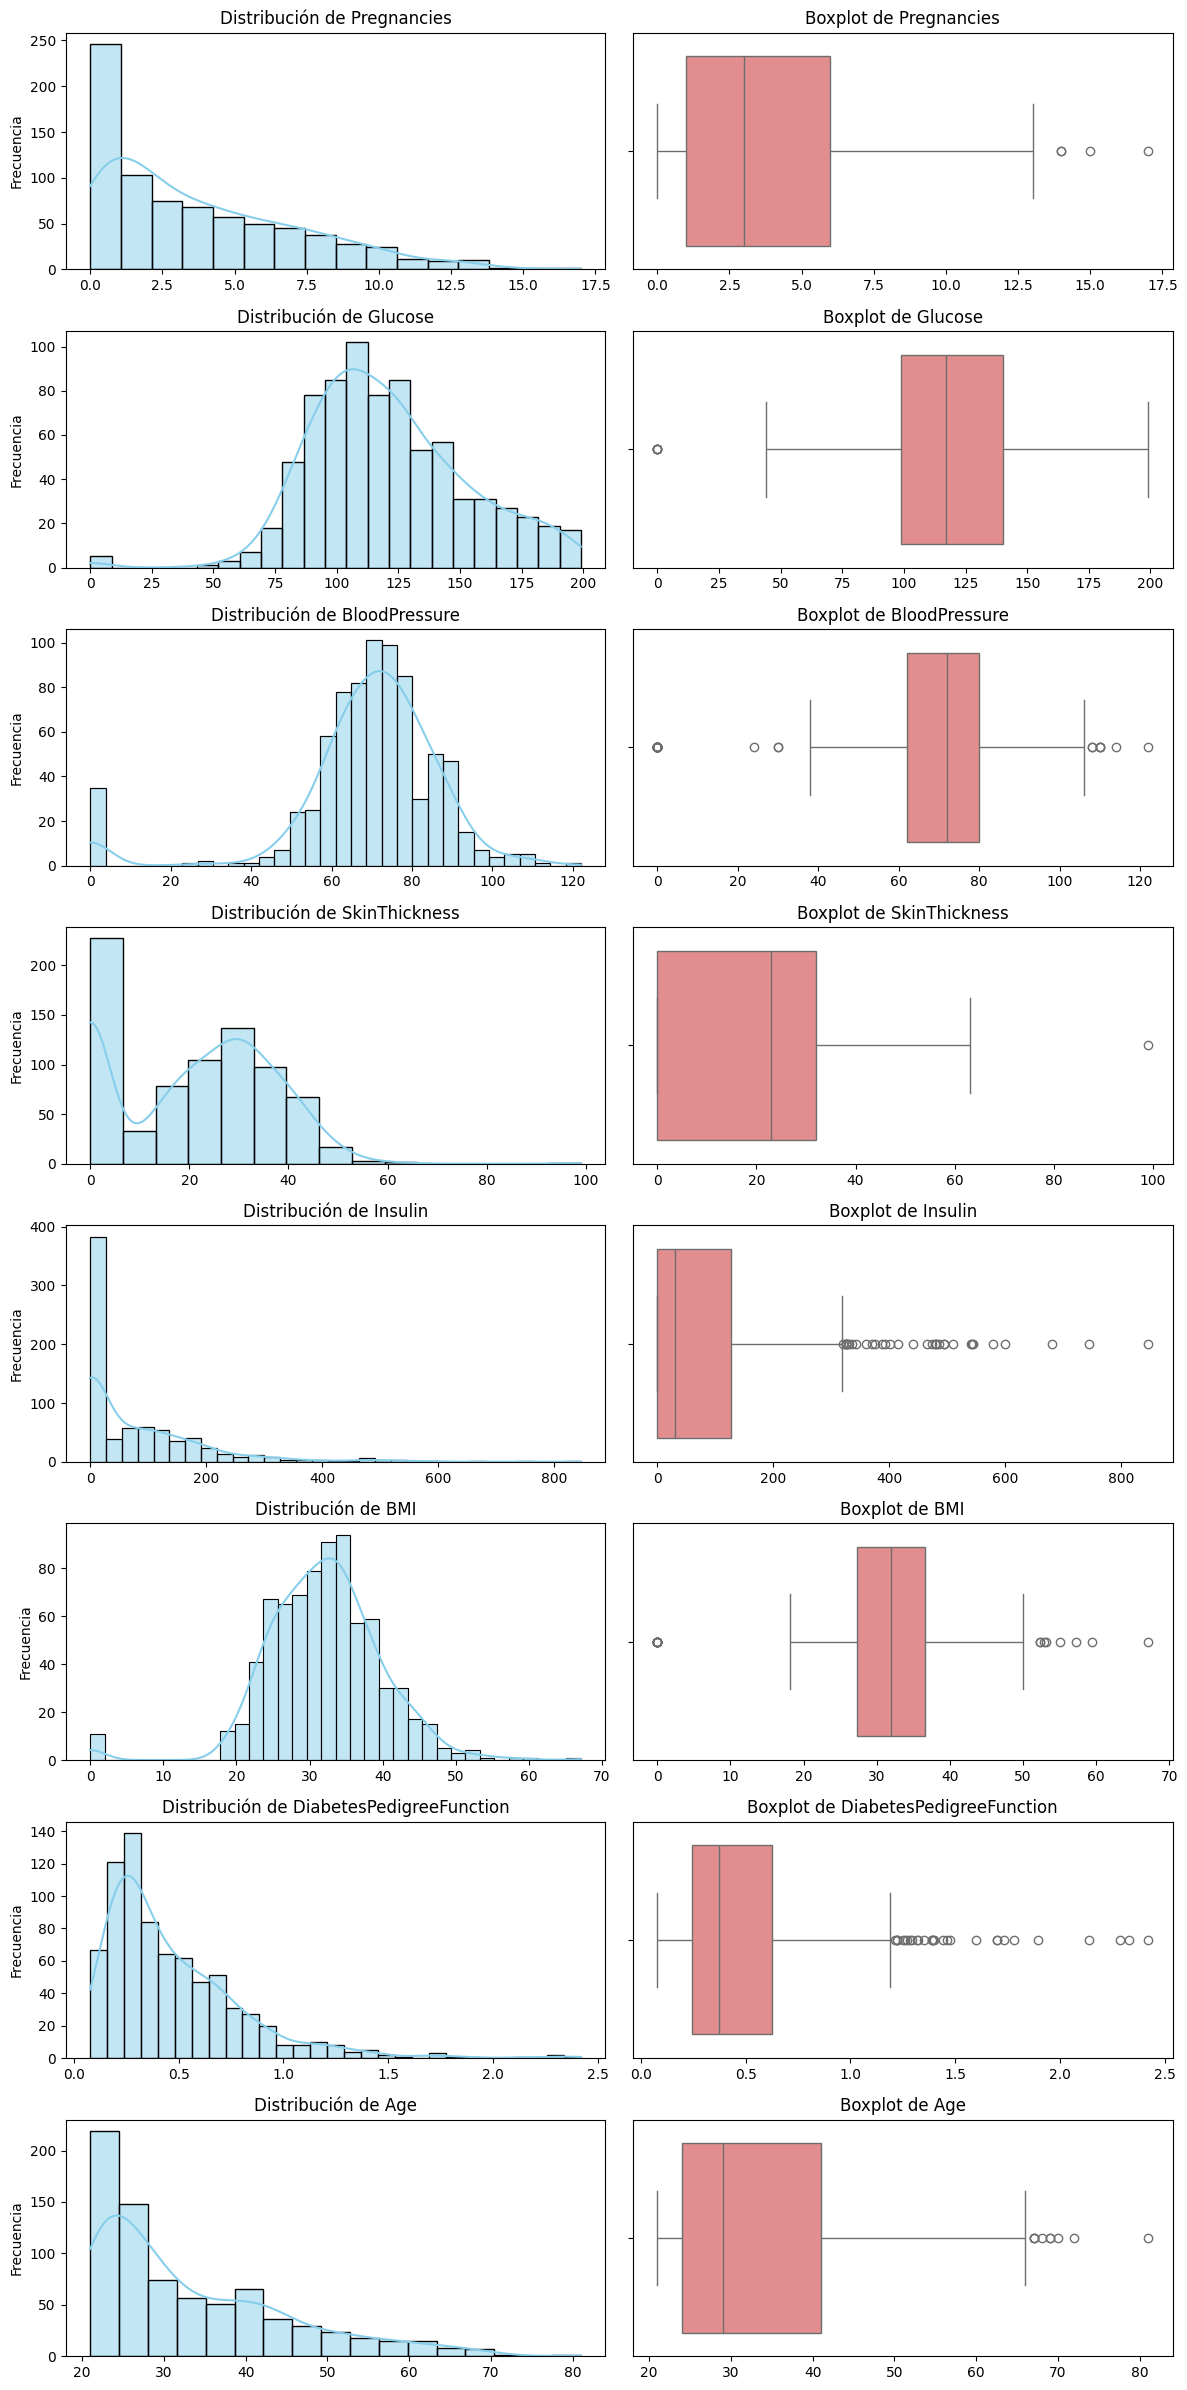

In [4]:
# Variables numéricas
variables = df.columns[:-1] # Sin la variable Outcome.


# Crear una figura con subplots
fig, axes = plt.subplots(len(variables), 2, figsize=(12, len(variables) * 3), 
                         gridspec_kw={'height_ratios': [1] * len(variables)})

# Iterar por cada variable y generar gráficos
for i, var in enumerate(variables):
    # Histograma
    sns.histplot(ax=axes[i, 0], data=df, x=var, kde=True, color='skyblue')
    axes[i, 0].set(title=f"Distribución de {var}", xlabel=None, ylabel="Frecuencia")
    
    # Boxplot
    sns.boxplot(ax=axes[i, 1], data=df, x=var, color='lightcoral')
    axes[i, 1].set(title=f"Boxplot de {var}", xlabel=None, ylabel=None)

# Ajustar diseño
plt.tight_layout()
plt.show()

Outcome
0    500
1    268
Name: count, dtype: int64


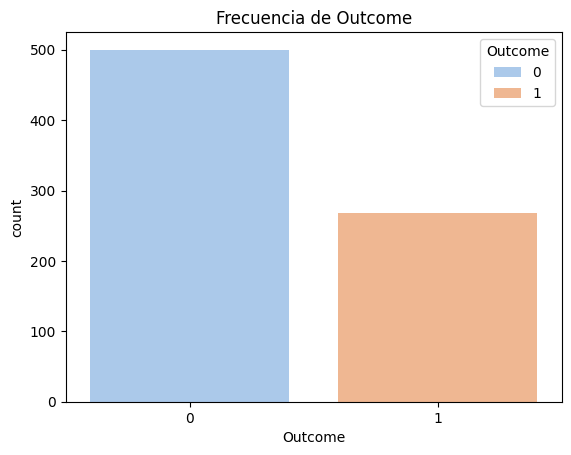

In [5]:
# Frecuencias de Outcome
outcome_counts = df['Outcome'].value_counts()
print(outcome_counts)

# Visualizar frecuencias
sns.countplot(data=df, x='Outcome', hue='Outcome', palette='pastel')
plt.title("Frecuencia de Outcome")
plt.show()

### Análisis multivariado

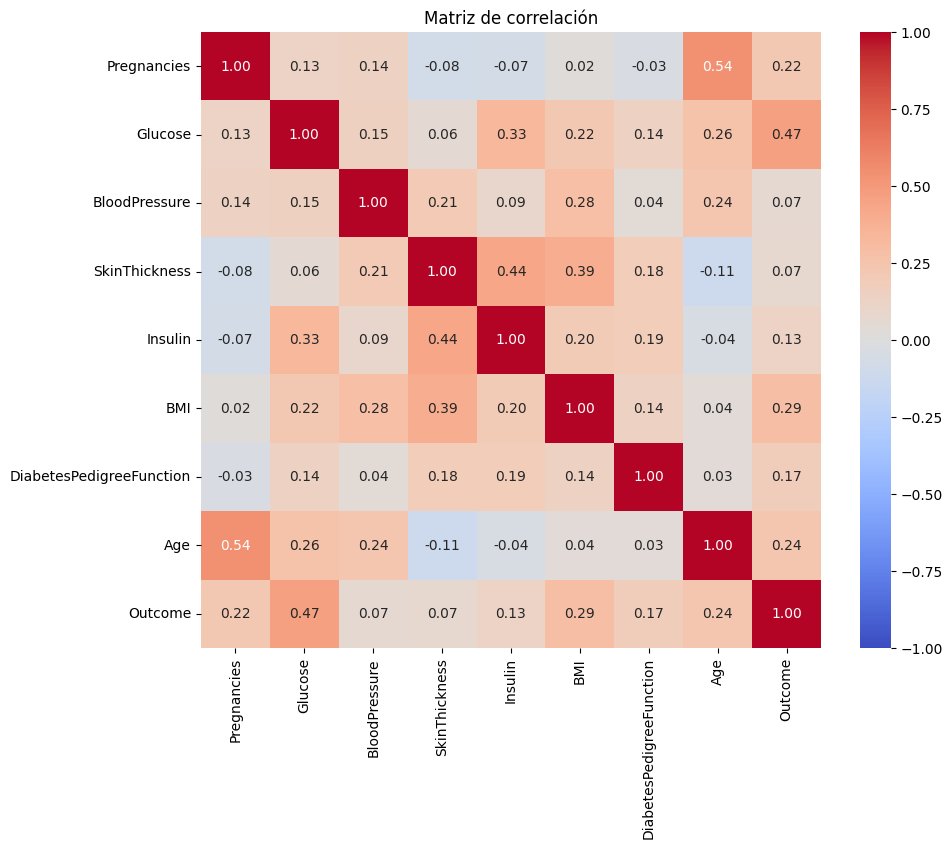

In [6]:
# Crear la matriz de correlación (incluyendo Outcome)
corr_matrix = df.corr()

# Graficar la matriz de correlación
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Matriz de correlación")
plt.show()

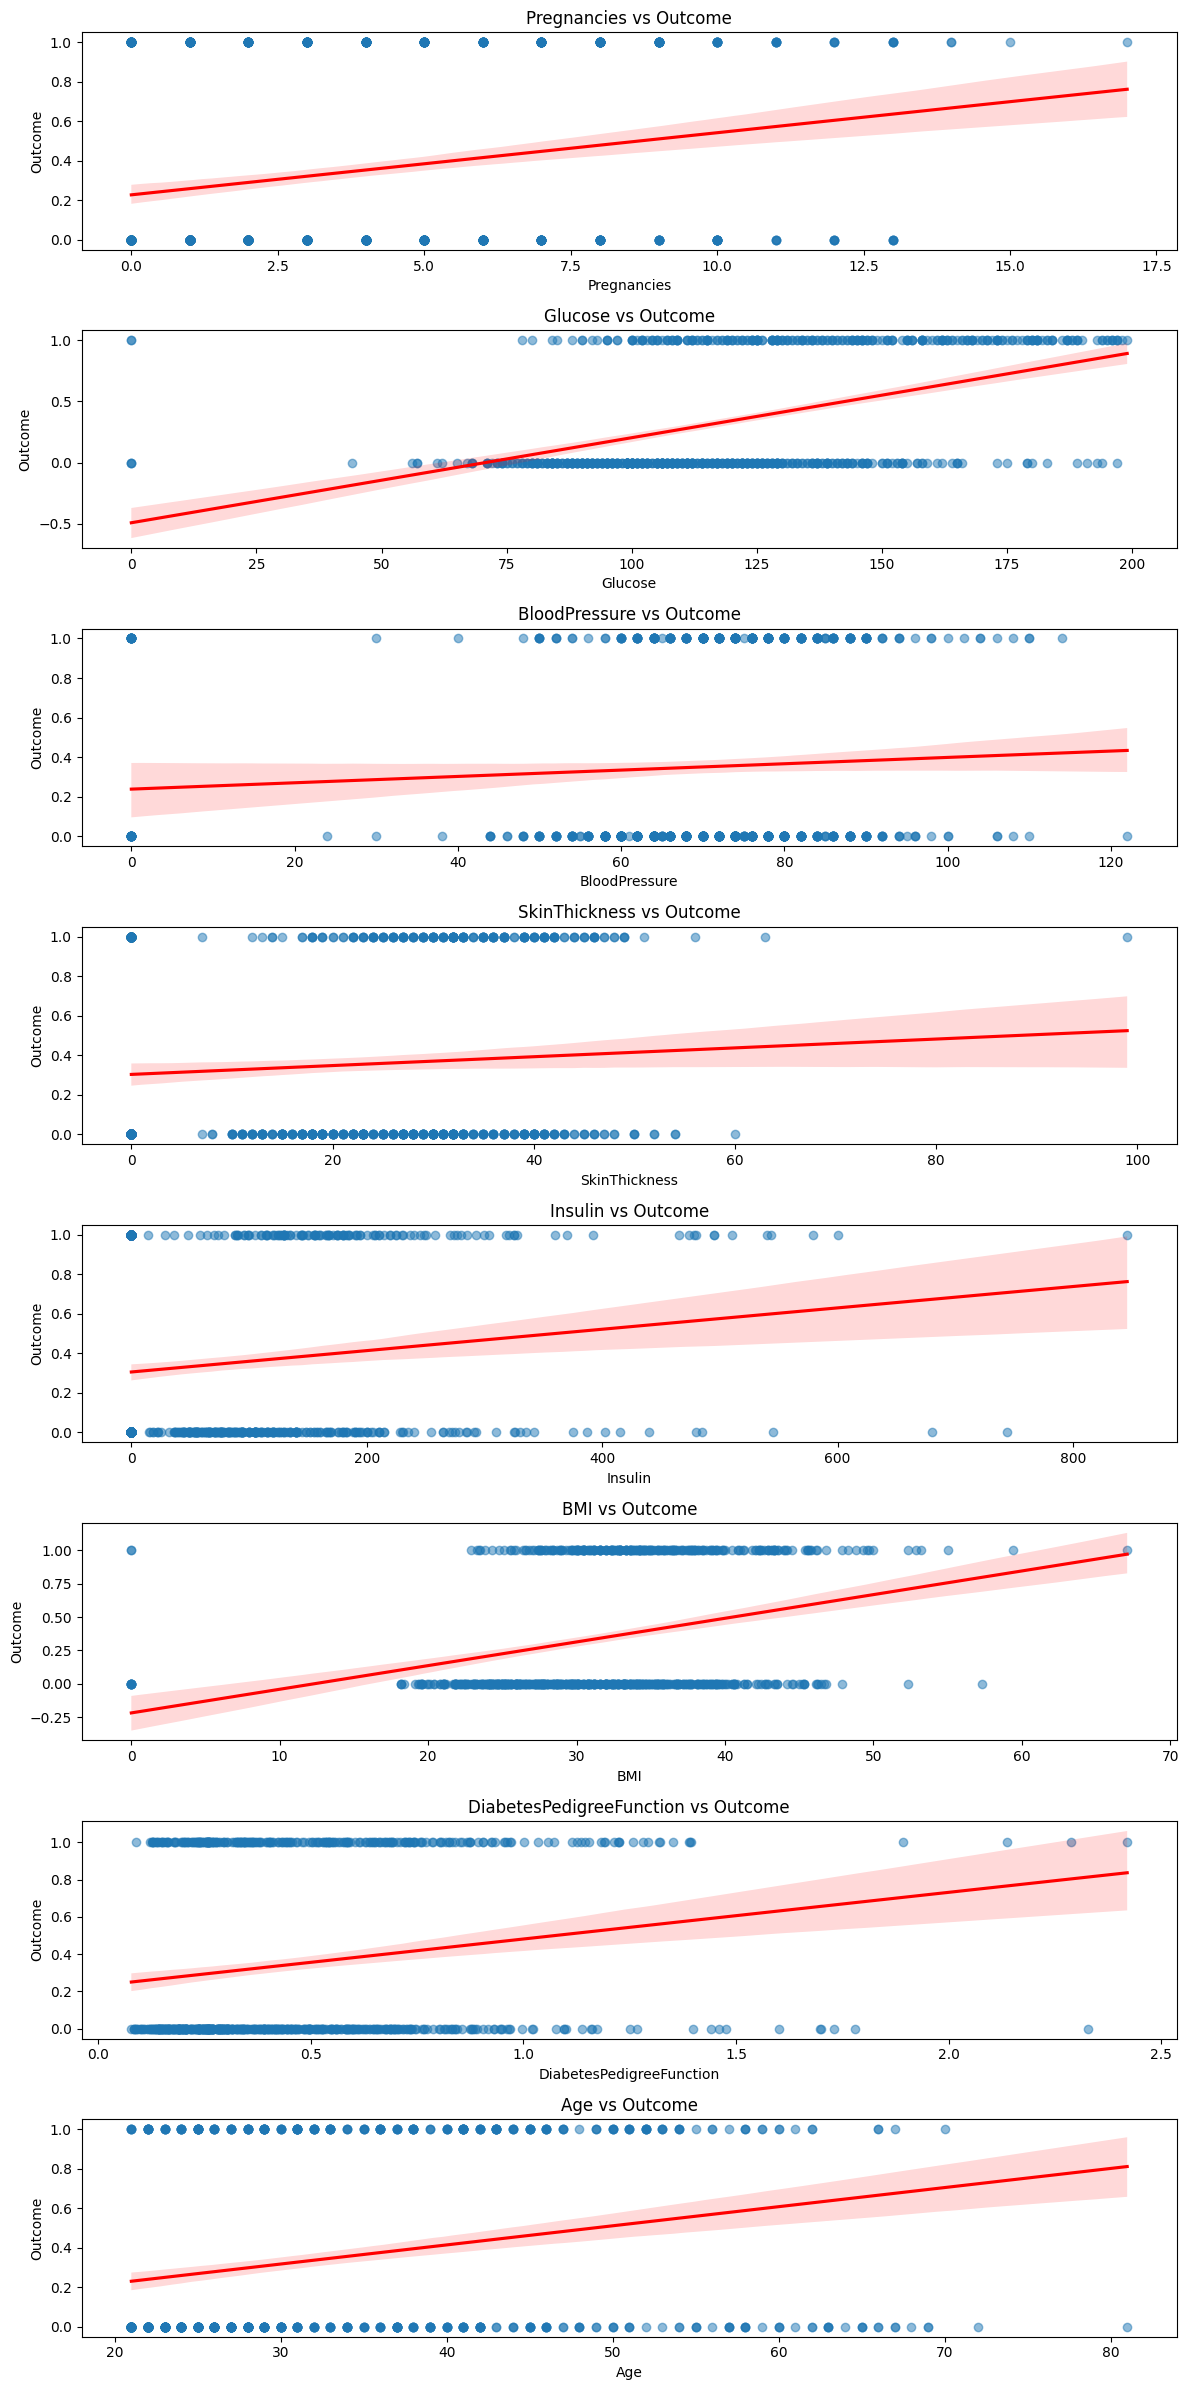

In [7]:
# Crear subplots
fig, axis = plt.subplots(figsize=(12, len(variables) * 3), nrows=len(variables), ncols=1)

# Iterar por cada variable numérica y graficar
for i, var in enumerate(variables):
    sns.regplot(ax=axis[i], data=df, x=var, y="Outcome", scatter_kws={'alpha':0.5}, line_kws={'color':'red'})
    axis[i].set_title(f"{var} vs Outcome", fontsize=12)
    axis[i].set_xlabel(var)
    axis[i].set_ylabel("Outcome")

# Ajustar el layout
plt.tight_layout()
plt.show()

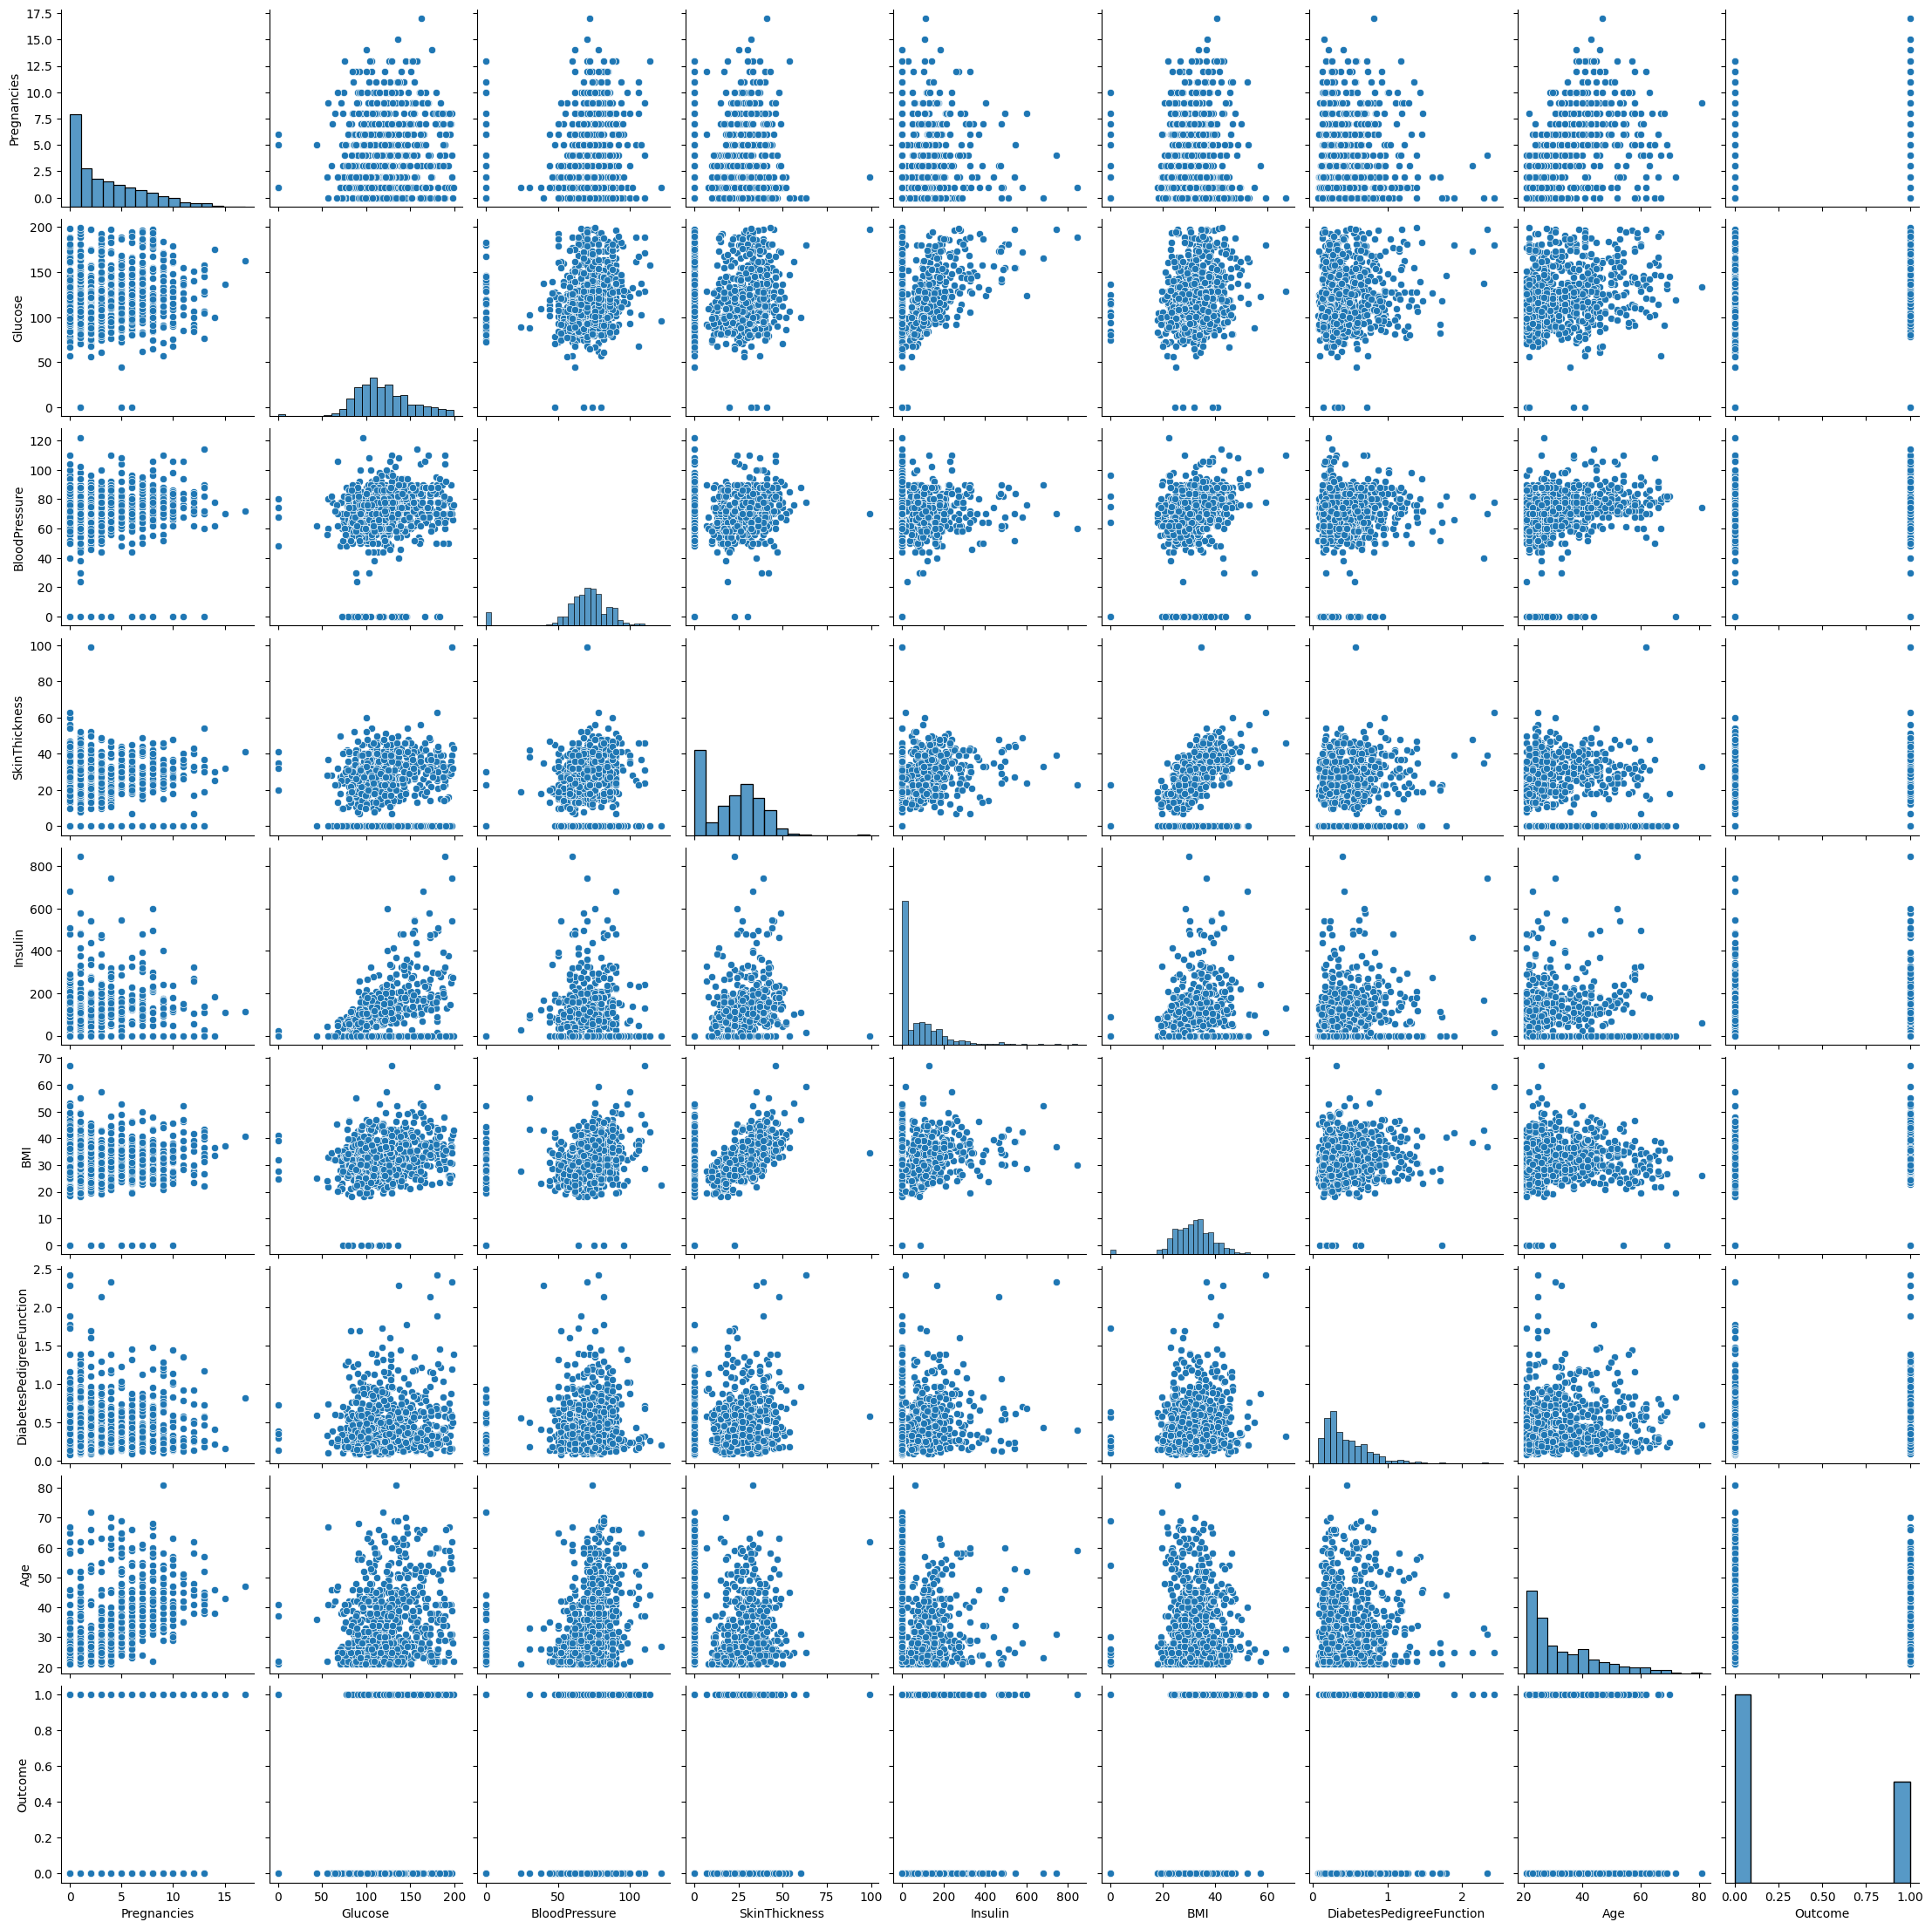

In [8]:
# relaciones todos con todos
sns.pairplot(data = df)

### Valores atípicos

In [9]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [10]:
# Función para detectar valores atípicos usando IQR y mostrar límites
def detectar_outliers_iqr(data, variables):
    outliers = {}
    limites = {}  # Diccionario para almacenar límites
    for var in variables:
        Q1 = data[var].quantile(0.25)  # Primer cuartil
        Q3 = data[var].quantile(0.75)  # Tercer cuartil
        IQR = Q3 - Q1                 # Rango intercuartílico
        lower_bound = Q1 - 1.5 * IQR  # Límite inferior
        upper_bound = Q3 + 1.5 * IQR  # Límite superior

        # Guardar límites
        limites[var] = {'lower_bound': lower_bound, 'upper_bound': upper_bound}

        # Filtrar valores atípicos
        outliers[var] = data[(data[var] < lower_bound) | (data[var] > upper_bound)][var]

    return outliers, limites

# Aplicar la función
outliers_detectados, limites_detectados = detectar_outliers_iqr(df, variables)

# Mostrar resumen
for var, outliers in outliers_detectados.items():
    print(f"\nVariable: {var}")
    print(f"Límite inferior (lower bound): {limites_detectados[var]['lower_bound']}")
    print(f"Límite superior (upper bound): {limites_detectados[var]['upper_bound']}")
    print(f"Número de valores atípicos: {len(outliers)}")
    print(f"Valores atípicos:\n{outliers.values}")


Variable: Pregnancies
Límite inferior (lower bound): -6.5
Límite superior (upper bound): 13.5
Número de valores atípicos: 4
Valores atípicos:
[15 17 14 14]

Variable: Glucose
Límite inferior (lower bound): 37.125
Límite superior (upper bound): 202.125
Número de valores atípicos: 5
Valores atípicos:
[0 0 0 0 0]

Variable: BloodPressure
Límite inferior (lower bound): 35.0
Límite superior (upper bound): 107.0
Número de valores atípicos: 45
Valores atípicos:
[  0   0  30 110   0   0   0   0 108 122  30   0 110   0   0   0   0   0
   0   0   0   0   0 108   0   0   0   0   0   0   0   0   0   0 110   0
  24   0   0   0   0 114   0   0   0]

Variable: SkinThickness
Límite inferior (lower bound): -48.0
Límite superior (upper bound): 80.0
Número de valores atípicos: 1
Valores atípicos:
[99]

Variable: Insulin
Límite inferior (lower bound): -190.875
Límite superior (upper bound): 318.125
Número de valores atípicos: 34
Valores atípicos:
[543 846 342 495 325 485 495 478 744 370 680 402 375 545 3

Analizando los valores atípicos, sólo eliminaremos aquellos datos cuya glucosa (Glucose), presión arterial (BloodPressure) y BMI son iguales a cero y SkinThickness igual a 99, porque son datos no coherentes. El resto de los outliers los dejaremos en nuestro dataset.

In [11]:
Glucose_zero=df[df["Glucose"] == 0]
print(f"Valores de Glucose cero vs Outcome: {Glucose_zero.Outcome.value_counts()}")

BloodPressure_zero=df[df["BloodPressure"] == 0]
print(f"Valores de BloodPressure cero vs Outcome: {BloodPressure_zero.Outcome.value_counts()}")

BMI_zero=df[df["BMI"] == 0]
print(f"Valores de BMI cero vs Outcome: {BMI_zero.Outcome.value_counts()}")

SkinThickness_99=df[df["SkinThickness"] == 99]
print(f"Valores de SkinThickness 99 vs Outcome: {SkinThickness_99.Outcome.value_counts()}")




Valores de Glucose cero vs Outcome: Outcome
0    3
1    2
Name: count, dtype: int64
Valores de BloodPressure cero vs Outcome: Outcome
0    19
1    16
Name: count, dtype: int64
Valores de BMI cero vs Outcome: Outcome
0    9
1    2
Name: count, dtype: int64
Valores de SkinThickness 99 vs Outcome: Outcome
1    1
Name: count, dtype: int64


In [12]:
# Filtrar las filas donde Glucose, BloodPressure, BMI sea diferente de 0.
df=df[df["Glucose"] != 0]

df=df[df["BloodPressure"] != 0]

df = df[df['BMI'] != 0]

df = df[df['SkinThickness'] != 99]
df


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


### Valores faltantes

In [13]:
df.isnull().sum().sort_values(ascending=False)

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

No tenemos valores NaN en nuestro dataset.

### Ingeniería de atributos

In [14]:
# Dividimos el conjunto de datos en muestras de train y test
X = df.drop("Outcome", axis = 1)
y = df["Outcome"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

X_train.shape

(578, 8)

In [15]:
num_variables=X_train.columns

# instancio el escalador
scaler = StandardScaler()

# entreno el escalador con los datos de entrenamiento
scaler.fit(X_train[num_variables])

# aplico el escalador en amhos
X_train_num_scal = scaler.transform(X_train[num_variables])
X_train_num_scal = pd.DataFrame(X_train_num_scal, index = X_train.index, columns = num_variables)

X_test_num_scal = scaler.transform(X_test[num_variables])
X_test_num_scal = pd.DataFrame(X_test_num_scal, index = X_test.index, columns = num_variables)

X_train_num_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
474,0.040997,-0.278257,-0.676255,-1.371949,-0.722044,-0.513863,-1.027192,-0.797677
6,-0.258957,-1.452932,-1.800153,0.677112,0.015679,-0.214397,-0.671709,-0.628202
387,1.240812,-0.571926,2.213768,0.933244,-0.722044,1.539614,-0.697934,0.981813
635,2.740581,-0.604556,-0.034028,-1.371949,-0.722044,-0.185877,-0.039417,0.388650
395,-0.558910,0.145931,-1.157926,0.164847,1.583339,-0.684986,3.267736,-0.712940


In [16]:
X_train_final=X_train_num_scal
X_test_final=X_test_num_scal

Guardado de datos

In [17]:
X_train_num_scal["Outcome"]=list(y_train)
X_test_num_scal["Outcome"]=list(y_test)

X_test_num_scal.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
359,-0.858864,2.397391,0.287086,0.933244,1.365376,0.569917,1.155237,-0.373989,1
552,0.640905,-0.278257,1.250427,-1.371949,-0.722044,-0.670725,-0.674623,2.761303,0
638,0.940858,-0.832965,0.287086,0.677112,0.040828,1.197368,1.143582,-0.119776,1
36,2.140673,0.504860,0.287086,-1.371949,-0.722044,0.099328,-0.170537,0.134437,0
467,-1.158818,-0.832965,-0.676255,0.933244,0.116277,0.612698,0.353945,-0.712940,0


In [18]:

X_train_num_scal.to_csv("../data/processed/clean_train.csv", index = False)
X_test_num_scal.to_csv("../data/processed/clean_test.csv", index = False)

### Iniciación y entrenamiento del modelo

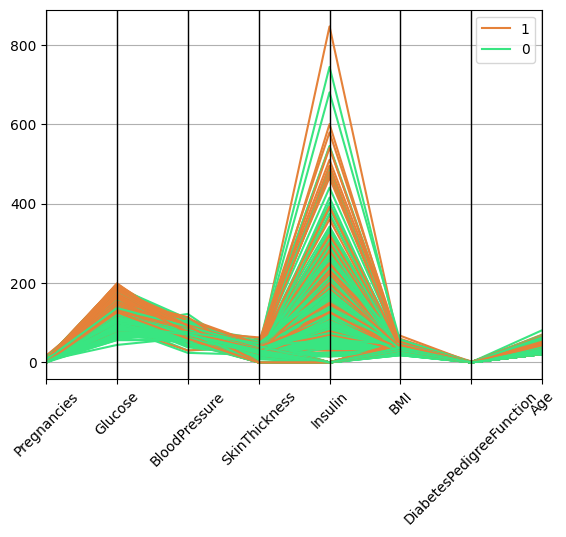

In [19]:
total_data = X
total_data["Outcome"] = y

pd.plotting.parallel_coordinates(total_data, "Outcome", color = ("#E58139", "#39E581", "#8139E5"))
plt.xticks(rotation=45)
plt.grid(True)  # Agregar líneas de cuadrícula para facilitar lectura
plt.show()

### Modelado

In [20]:
# modelo
model = DecisionTreeClassifier(random_state = 42)

# entrenamiento
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

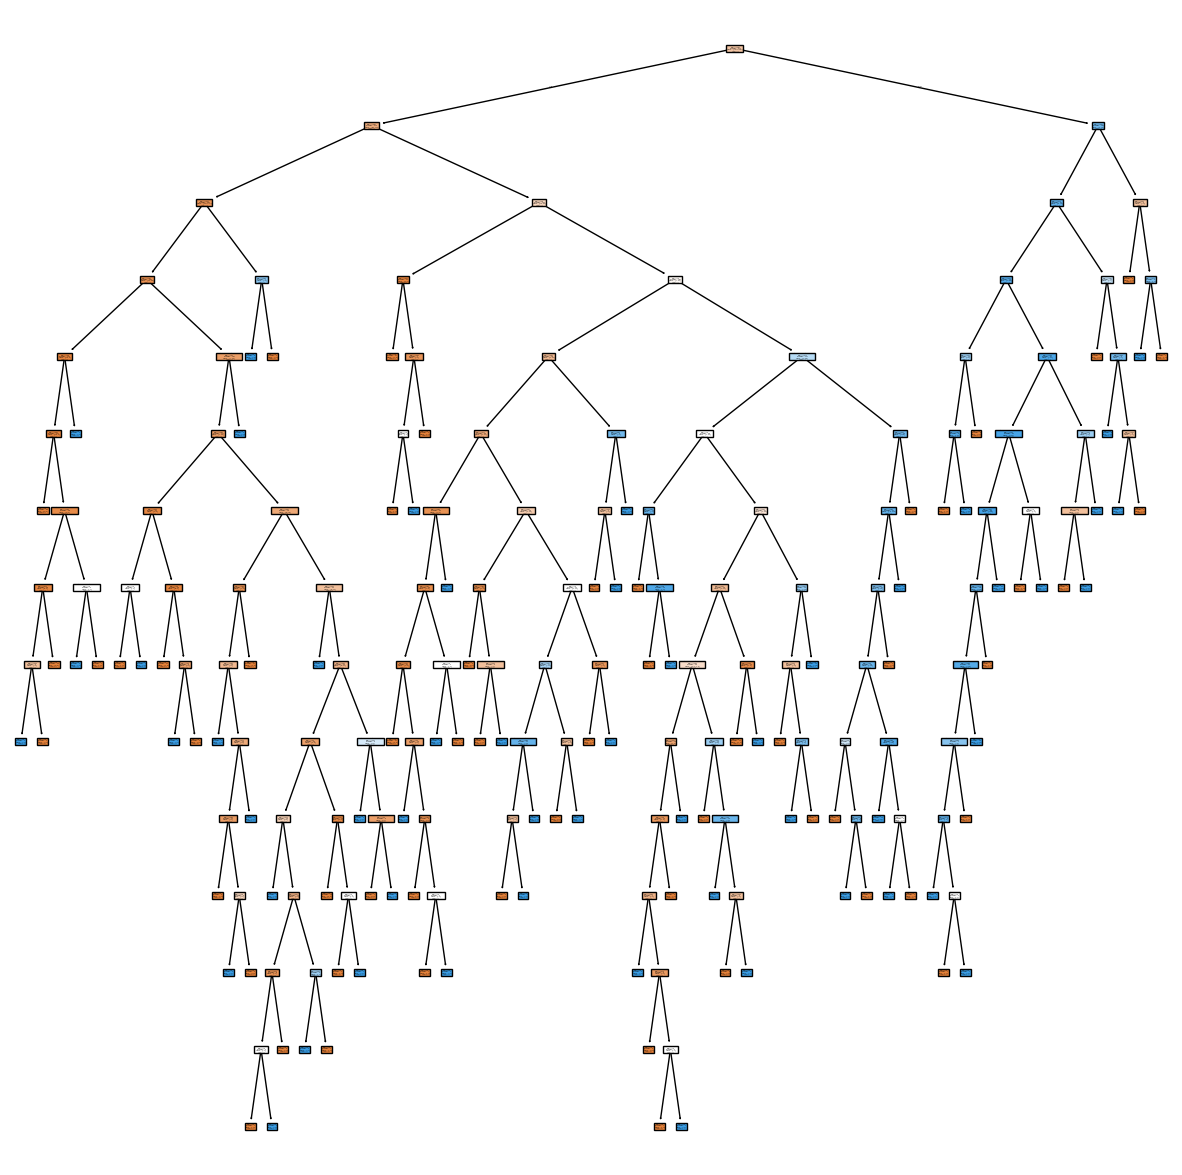

In [21]:
ig = plt.figure(figsize=(15,15))

tree.plot_tree(model, feature_names = list(X_train.columns), class_names = ["0", "1"], filled = True)

plt.show()

In [22]:
# predicción
y_pred_test = model.predict(X_test)
y_pred_test

array([1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [23]:
y_pred_train = model.predict(X_train)
y_pred_train

array([0, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1,
       0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1,
       1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,

In [24]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.696551724137931
F1 score Test:  0.696551724137931
Precision Test:  0.696551724137931
Recall Test:  0.696551724137931
Accuracy Train:  1.0
F1 score Train:  1.0
Precision Train:  1.0
Recall Train:  1.0


Notamos que las mediciones en el entrenamiento son altas, mientras que en el testeo no llegan al 0.7. Es un indicador de overfiting.

In [25]:
print(classification_report(y_test, y_pred_test, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       0.77      0.79      0.78       100
           1       0.51      0.49      0.50        45

    accuracy                           0.70       145
   macro avg       0.64      0.64      0.64       145
weighted avg       0.69      0.70      0.69       145



In [26]:
print(classification_report(y_train, y_pred_train, target_names=["0", "1"]))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       375
           1       1.00      1.00      1.00       203

    accuracy                           1.00       578
   macro avg       1.00      1.00      1.00       578
weighted avg       1.00      1.00      1.00       578



### Hiperparámetros

In [ ]:
def warn(*args, **kwargs):
    pass
import warnings
warnings.warn = warn

In [27]:
# Definir el espacio de hiperparámetros a explorar
hyperparams = {
    'criterion': ['gini', 'entropy', 'log_loss'],  # Función de división
    'splitter': ['best', 'random'],               # Estrategia de división
    'max_depth': [3, 5, 10, None],                # Profundidad máxima del árbol
    'min_samples_split': [2, 5, 10],             # Mínimo de muestras para dividir un nodo
    'min_samples_leaf': [1, 2, 4],               # Mínimo de muestras en una hoja
    'max_features': [None, 'sqrt', 'log2'],      # Máximo número de características
}

# Inicializamos la cuadrícula
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid



GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [3, 5, 10, None],
                         'max_features': [None, 'sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'splitter': ['best', 'random']},
             scoring='accuracy')

In [28]:
grid.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {grid.best_params_}")

Mejores hiperparámetros: {'criterion': 'gini', 'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'splitter': 'best'}


In [31]:
#Evaluar el modelo con los mejores hiperparámetros
best_model = grid.best_estimator_
y_pred_test = best_model.predict(X_test)

y_pred_test



array([1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0])

In [32]:
#Evaluar el modelo con los mejores hiperparámetros
best_model = grid.best_estimator_
y_pred_train = best_model.predict(X_train)

y_pred_train

array([0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,

In [33]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7655172413793103
F1 score Test:  0.7655172413793103
Precision Test:  0.7655172413793103
Recall Test:  0.7655172413793103
Accuracy Train:  0.8183391003460208
F1 score Train:  0.8183391003460208
Precision Train:  0.8183391003460208
Recall Train:  0.8183391003460208


Con estos hiperparámetros notamos que mejoró la medida en el test, y bajó la perfección en el train. Este modelo es mejor que el anterior.

#### Random search

In [43]:
hyperparams={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20, 0.1, 0.2],
    'min_samples_leaf': [1, 2, 4, 0.01, 0.05],
    'max_features': [None, 'sqrt', 'log2', 5],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'class_weight': [None, 'balanced']
}

# Inicializamos la búsqueda aleatoria
random_search = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10, 20, None],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         5],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_samples_leaf': [1, 2, 4, 0.01,
                                                             0.05],
                                        'min_samples_split': [2, 5, 10, 20, 0.1,
                                                              0.2],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [44]:
random_search.fit(X_train, y_train)

print(f"Mejores hiperparámetros: {random_search.best_params_}")

Mejores hiperparámetros: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 0.05, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': None}


In [45]:
model_random_search = DecisionTreeClassifier(splitter= 'best', min_samples_split= 5, min_samples_leaf= 0.05, max_leaf_nodes= None, max_features= None, max_depth= 5, criterion= 'log_loss',class_weight= None,random_state = 42)

model_random_search.fit(X_train, y_train)

DecisionTreeClassifier(criterion='log_loss', max_depth=5, min_samples_leaf=0.05,
                       min_samples_split=5, random_state=42)

In [46]:
y_pred_test = model_random_search.predict(X_test)

y_pred_test


array([1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

In [47]:
y_pred_train = model_random_search.predict(X_train)

y_pred_train

array([0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1,

In [48]:
# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7862068965517242
F1 score Test:  0.7862068965517242
Precision Test:  0.7862068965517242
Recall Test:  0.7862068965517242
Accuracy Train:  0.8114186851211073
F1 score Train:  0.8114186851211073
Precision Train:  0.8114186851211073
Recall Train:  0.8114186851211073


Podemos observar una mejora en este modelo.

In [56]:
hyperparams={
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [3, 5, 10, 20, None],
    'min_samples_split': [2, 5, 10, 20, 0.1, 0.2],
    'min_samples_leaf': [1, 2, 4, 0.01, 0.05],
    'max_features': [None, 'sqrt', 'log2', 5],
    'max_leaf_nodes': [None, 10, 20, 50, 100],
    'class_weight': [None, 'balanced']
}

# Inicializamos la búsqueda aleatoria
random_search2 = RandomizedSearchCV(model, hyperparams, n_iter = 100, scoring = "accuracy", cv = 5, random_state = 42)
random_search2

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'class_weight': [None, 'balanced'],
                                        'criterion': ['gini', 'entropy',
                                                      'log_loss'],
                                        'max_depth': [3, 5, 10, 20, None],
                                        'max_features': [None, 'sqrt', 'log2',
                                                         5],
                                        'max_leaf_nodes': [None, 10, 20, 50,
                                                           100],
                                        'min_samples_leaf': [1, 2, 4, 0.01,
                                                             0.05],
                                        'min_samples_split': [2, 5, 10, 20, 0.1,
                                                              0.2],
                                        'splitter': ['best', 'random']},
                   random_state=42, scoring='accuracy')

In [57]:
# Entrenamos el RandomizedSearchCV
random_search2.fit(X_train, y_train)

# Imprimir los mejores hiperparámetros encontrados
print(f"Mejores hiperparámetros: {random_search2.best_params_}")

# Usar el modelo entrenado con los mejores hiperparámetros
random_model2 = random_search2.best_estimator_

# Entrenar el mejor modelo nuevamente si es necesario (ya está entrenado en el RandomizedSearchCV)
random_model2.fit(X_train, y_train)

Mejores hiperparámetros: {'splitter': 'best', 'min_samples_split': 5, 'min_samples_leaf': 0.05, 'max_leaf_nodes': None, 'max_features': None, 'max_depth': None, 'criterion': 'log_loss', 'class_weight': None}


DecisionTreeClassifier(criterion='log_loss', min_samples_leaf=0.05,
                       min_samples_split=5, random_state=42)

In [58]:
y_pred_test = random_model2.predict(X_test)
y_pred_train = random_model2.predict(X_train)

# metricas
accuracy_test = accuracy_score(y_test, y_pred_test)
accuracy_train = accuracy_score(y_train, y_pred_train)

f1_score_test = f1_score(y_test, y_pred_test, average='micro')
f1_score_train = f1_score(y_train, y_pred_train, average='micro')

precision_test = precision_score(y_test, y_pred_test, average='micro')
precision_train = precision_score(y_train, y_pred_train, average='micro')

recall_test = recall_score(y_test, y_pred_test, average='micro')
recall_train = recall_score(y_train, y_pred_train, average='micro')

print("Accuracy Test: ", accuracy_test)
print("F1 score Test: ", f1_score_test)
print("Precision Test: ", precision_test)
print("Recall Test: ", recall_test)

print("Accuracy Train: ", accuracy_train)
print("F1 score Train: ", f1_score_train)
print("Precision Train: ", precision_train)
print("Recall Train: ", recall_train)

Accuracy Test:  0.7862068965517242
F1 score Test:  0.7862068965517242
Precision Test:  0.7862068965517242
Recall Test:  0.7862068965517242
Accuracy Train:  0.8114186851211073
F1 score Train:  0.8114186851211073
Precision Train:  0.8114186851211073
Recall Train:  0.8114186851211073


No hay cambios con el modelo anterior.

### Mejor modelo

In [59]:
dump(model_random_search, open("decision_tree_classifier_default_42.sav", "wb"))